In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage

In [2]:
from pathlib import Path

In [4]:
img = Path('saved_snapshots/sample.png')

In [5]:
cv2_im = cv2.imread(str(img))

In [6]:
gray = cv2.cvtColor(cv2_im, cv2.COLOR_BGR2GRAY)

In [7]:
np.max(gray)

255

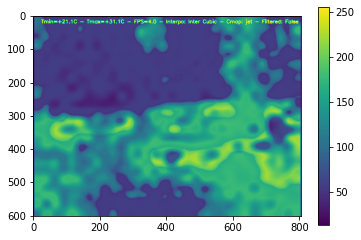

In [14]:
ax = plt.subplot()
im = ax.imshow(gray)
plt.colorbar(im)

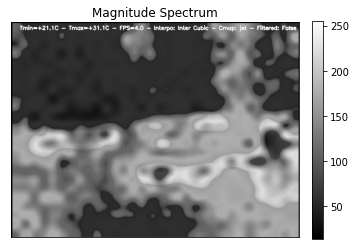

In [30]:
plt.imshow(gray, cmap = 'gray'), plt.colorbar(cmap = 'gray',fraction=0.1, pad=0.04)
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
plt.show() 

In [54]:
def generate_colorbar(min_temp, max_temp, height, cmap=cv2.COLORMAP_JET):
        cb_gray = np.arange(255,0,-1,dtype=np.uint8).reshape((255,1))
        cb_color = cv2.applyColorMap(cb_gray, cmap)
        
        for i in range(1,6):
            cb_color = np.concatenate( (cb_color, cb_color), axis=1 )
        
        append_img = np.zeros( (height, cb_color.shape[1]+60, 3), dtype=np.uint8 ) + 255

        append_img[append_img.shape[0]//2-cb_color.shape[0]//2  : append_img.shape[0]//2 - (cb_color.shape[0]//2) + cb_color.shape[0] , 10 : 10 + cb_color.shape[1] ] = cb_color
        cv2.putText(append_img, str(min_temp), (5, append_img.shape[0]//2 - (cb_color.shape[0]//2) + cb_color.shape[0] + 30), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0) , 1, 8)
        cv2.putText(append_img, str(max_temp), (5, append_img.shape[0]//2-cb_color.shape[0]//2-20) , cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255) , 1, 8 )
        return append_img 

In [55]:
colorbar = generate_colorbar(np.min(gray), np.max(gray), height=255)

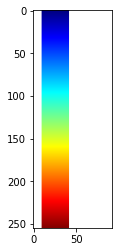

In [56]:
plt.imshow(colorbar)

In [127]:
t_range = np.arange(255, -1, -1)
# t_range

In [135]:
w = 50
bar = np.tile(t_range, [w, 1]).T

In [136]:
print(bar)
bar.shape

[[255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]
 [253 253 253 ... 253 253 253]
 ...
 [  2   2   2 ...   2   2   2]
 [  1   1   1 ...   1   1   1]
 [  0   0   0 ...   0   0   0]]


(256, 50)

In [137]:
c_image = ndimage.zoom(bar, 2)
c_image.shape

(512, 100)

In [194]:
c_bar = cv2.applyColorMap(c_image.astype(np.uint8), cv2.COLORMAP_JET)

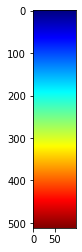

In [221]:
f = plt.imshow(c_bar)

In [222]:
margin = 30
wc = 100
canvas = np.ones((c_bar.shape[0] + 2 * margin, c_bar.shape[1] + wc, 3), dtype=np.uint8) * 255
canvas[margin:-margin, :c_bar.shape[1], :] = c_bar

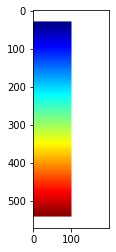

In [223]:
plt.imshow(canvas)

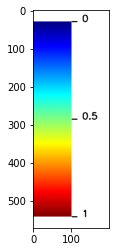

In [201]:
text = "- 400"
cv2.putText(canvas, "_ 0", (c_bar.shape[1], margin + c_bar.shape[0] * 0), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
cv2.putText(canvas, "_ 0.5", (c_bar.shape[1], margin + c_bar.shape[0] // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
cv2.putText(canvas, "_ 1", (c_bar.shape[1], margin + c_bar.shape[0] // 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

plt.imshow(canvas)

In [224]:
canvas.shape

(572, 200, 3)

In [225]:
tmin = 19.2
tmax = 33.5

In [226]:
step = 5
t_scale = np.arange(tmin - tmin % step + step, tmax - tmax % step + step, step).astype(int)
t_scale

array([20, 25, 30])

In [227]:
pos = np.interp(t_scale, [tmin, tmax], [margin + c_bar.shape[0], margin]).astype(int)

In [228]:
for t, p in zip(t_scale, pos):
    cv2.putText(canvas, f"_ {t}", (c_bar.shape[1], p), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

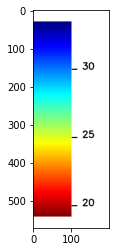

In [229]:
plt.imshow(canvas)

In [3]:
cmap = cv2.COLORMAP_JET


def get_t_ticks(tmin, tmax, step, bounds):
    t_ticks = np.arange(tmin - tmin % step + step, tmax - tmax % step + step, step).astype(int)
    t_pos = np.interp(t_ticks, [tmin, tmax], bounds).astype(int)
    return t_ticks, t_pos


def add_ticks_to_colorbar(canvas, t_ticks, t_pos, y_pos):
    for t, p in zip(t_ticks, t_pos):
        cv2.putText(canvas, f"_ {t}", (y_pos, p), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)


def get_raw_bar(height, width, cmap):
    map_range = np.arange(255, -1, -1)
    c_bar = cv2.applyColorMap(map_range.astype(np.uint8), cmap)
    return cv2.resize(c_bar, [width, height])
    

def get_colorbar(image, tmin, tmax):
    height = 500
    width = 100
    v_margin = 30
    h_margin = 100
    step = 5
    
    c_bar = get_raw_bar(height, width, cmap=cv2.COLORMAP_JET)
    canvas = np.ones((c_bar.shape[0] + 2 * v_margin, c_bar.shape[1] + h_margin, 3), dtype=np.uint8) * 255
    canvas[v_margin:-v_margin, :c_bar.shape[1], :] = c_bar
    
    t_ticks, t_pos = get_t_ticks(tmin, tmax, step, [v_margin + c_bar.shape[0], v_margin])
    add_ticks_to_colorbar(canvas, t_ticks, t_pos, c_bar.shape[1])
    
    return canvas

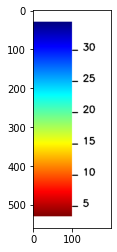

In [4]:
colorbar = get_colorbar(0, 3.4, 34.6)
plt.imshow(colorbar)

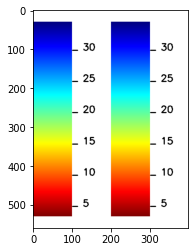

In [7]:
wide_image = cv2.hconcat([colorbar, colorbar])
plt.imshow(wide_image)

In [11]:
colorbar.shape

(560, 200, 3)